# Contour Detection

## External vs Internal Contours

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
img = cv2.imread('Shape.png',0)

In [16]:
img.shape

(578, 1132)

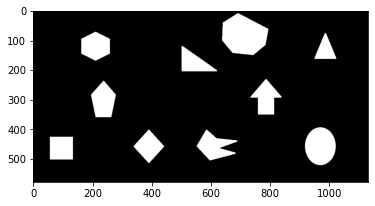

In [17]:
plt.imshow(img,cmap='gray')

**findContours**

function will return back contours in an image, and based on the RETR method called, you can get back external, internal, or both:

* cv2.RETR_EXTERNAL:Only extracts external contours
* cv2.RETR_CCOMP: Extracts both internal and external contours organized in a two-level hierarchy
* cv2.RETR_TREE: Extracts both internal and external contours organized in a  tree graph
* cv2.RETR_LIST: Extracts all contours without any internal/external relationship

In [18]:
#image, contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [19]:
type(contours)

list

In [20]:
len(contours)

10

In [21]:
type(hierarchy)

numpy.ndarray

In [22]:
hierarchy.shape

(1, 10, 4)

In [23]:
hierarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [ 6,  4, -1, -1],
        [ 7,  5, -1, -1],
        [ 8,  6, -1, -1],
        [ 9,  7, -1, -1],
        [-1,  8, -1, -1]]], dtype=int32)

In [24]:
# Draw External Contours

# Set up empty array
external_contours = np.zeros(img.shape)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(external_contours, contours, i, 255, -1)

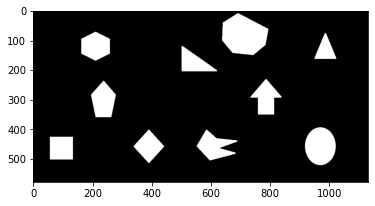

In [25]:
plt.imshow(external_contours,cmap='gray')

In [26]:
# Create empty array to hold internal contours
image_internal = np.zeros(img.shape)

# Iterate through list of contour arrays
for i in range(len(contours)):
    # If third column value is NOT equal to -1 than its internal
    if hierarchy[0][i][3] != -1:
        
        # Draw the Contour
        cv2.drawContours(image_internal, contours, i, 255, -1)
        

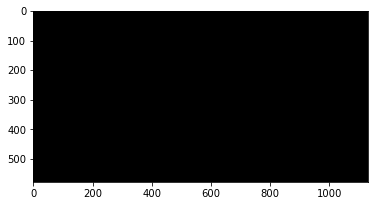

In [29]:
plt.imshow(image_internal,cmap='gray')